# Annotations Cookbook

---

## Annotations for Structured Outputs and Data Extraction
In this cookbook, we will explore the basics of Annotations and to achieve structured outputs fueled by our OCR model.

You may want to do this in case current vision models are not powerful enough, hence enhancing their vision OCR capabilities with the OCR model to achieve better structured data extraction.

---

- [OCR without Annotations](#scrollTo=NhwM0aITt7ti)
- [OCR with Annotations](#scrollTo=LNzRYPDcyaLX)
- [Full Document with Annotations](#scrollTo=thKVdfrJ2fvB)
- [Other Examples](#scrollTo=UtCyIWRuimm6)

## What are Annotations?

Mistral Document AI API adds two annotation functionalities:
- `document_annotation`: returns the annotation of the entire document based on the input schema.
- `box_annotation`: gives you the annotation of the bboxes extracted by the OCR model (charts/ figures etc) based on user requirement. The user may ask to describe/caption the figure for instance.

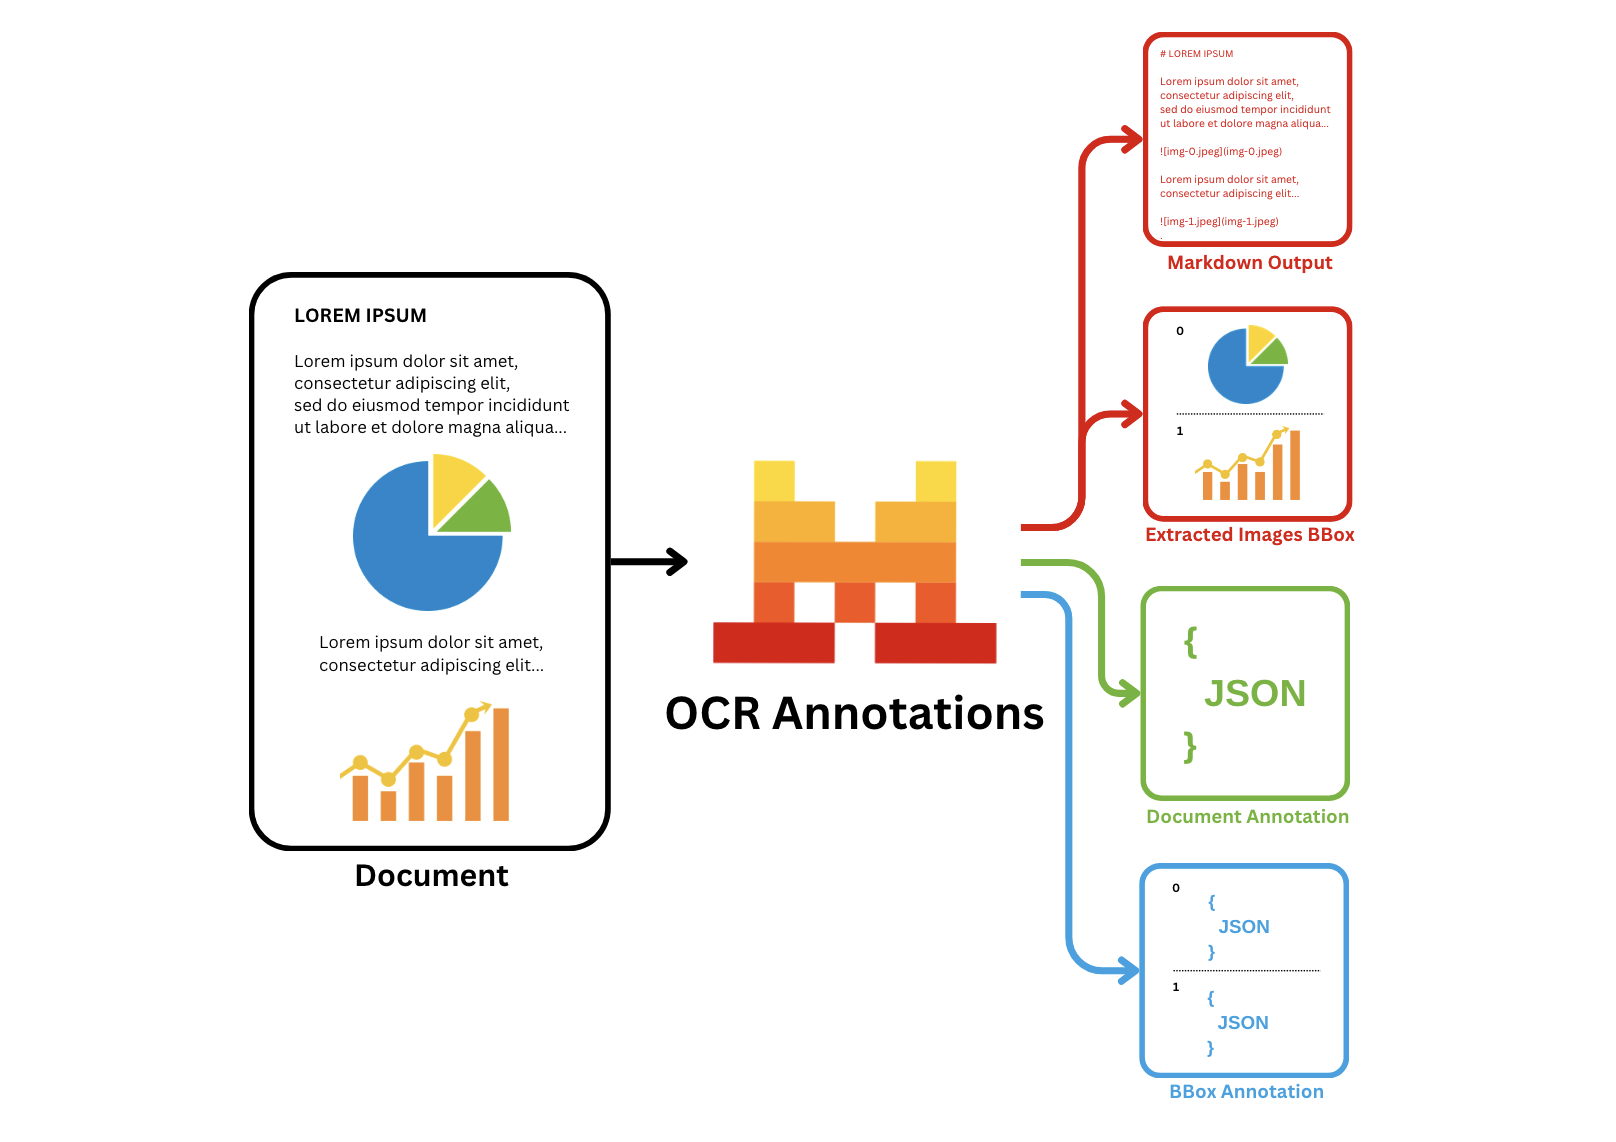

Learn more about Annotations [here](https://docs.mistral.ai/capabilities/OCR/annotations/).

## Setup

First, let's install `mistralai` and download the required files.

In [1]:
%%capture
!pip install mistralai

### Create Client

We will need to set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [5]:
# Initialize Mistral client with API key
from mistralai import Mistral
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.environ["MISTRAL_API_KEY"]
client = Mistral(api_key=api_key)

## Mistral OCR without Annotations
For our cookbook we will use a pdf file about Mistral 7B model, annotate it and extract data from the document.

In [10]:
import requests
import os
import json

# Call the OCR API
pdf_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": "https://arxiv.org/pdf/2310.06825"
    },
    include_image_base64=True
)

# Convert response to JSON format
response_dict = json.loads(pdf_response.model_dump_json())

print(json.dumps(response_dict, indent=4)[0:1000]) # check the first 1000 characters

{
    "pages": [
        {
            "index": 0,
            "markdown": "# Mistral 7B \n\nAlbert Q. Jiang, Alexandre Sablayrolles, Arthur Mensch, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Florian Bressand, Gianna Lengyel, Guillaume Lample, Lucile Saulnier, L\u00e9lio Renard Lavaud, Marie-Anne Lachaux, Pierre Stock, Teven Le Scao, Thibaut Lavril, Thomas Wang, Timoth\u00e9e Lacroix, William El Sayed\n\n![img-0.jpeg](img-0.jpeg)\n\n## Abstract\n\nWe introduce Mistral 7B, a 7-billion-parameter language model engineered for superior performance and efficiency. Mistral 7B outperforms the best open 13B model (Llama 2) across all evaluated benchmarks, and the best released 34B model (Llama 1) in reasoning, mathematics, and code generation. Our model leverages grouped-query attention (GQA) for faster inference, coupled with sliding window attention (SWA) to effectively handle sequences of arbitrary length with a reduced inference cost. We also provide a model fine-tuned to f

We can view the result with the following:



# Mistral 7B 

Albert Q. Jiang, Alexandre Sablayrolles, Arthur Mensch, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Florian Bressand, Gianna Lengyel, Guillaume Lample, Lucile Saulnier, Lélio Renard Lavaud, Marie-Anne Lachaux, Pierre Stock, Teven Le Scao, Thibaut Lavril, Thomas Wang, Timothée Lacroix, William El Sayed

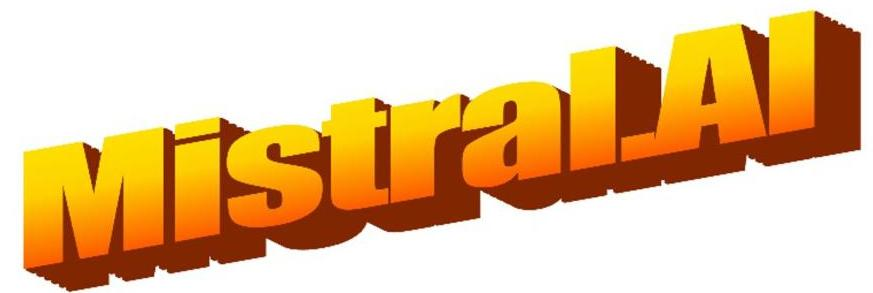

## Abstract

We introduce Mistral 7B, a 7-billion-parameter language model engineered for superior performance and efficiency. Mistral 7B outperforms the best open 13B model (Llama 2) across all evaluated benchmarks, and the best released 34B model (Llama 1) in reasoning, mathematics, and code generation. Our model leverages grouped-query attention (GQA) for faster inference, coupled with sliding window attention (SWA) to effectively handle sequences of arbitrary length with a reduced inference cost. We also provide a model fine-tuned to follow instructions, Mistral 7B - Instruct, that surpasses Llama 213B - chat model both on human and automated benchmarks. Our models are released under the Apache 2.0 license. Code: https://github.com/mistralai/mistral-src Webpage: https://mistral.ai/news/announcing-mistral-7b/

## 1 Introduction

In the rapidly evolving domain of Natural Language Processing (NLP), the race towards higher model performance often necessitates an escalation in model size. However, this scaling tends to increase computational costs and inference latency, thereby raising barriers to deployment in practical, real-world scenarios. In this context, the search for balanced models delivering both high-level performance and efficiency becomes critically essential. Our model, Mistral 7B, demonstrates that a carefully designed language model can deliver high performance while maintaining an efficient inference. Mistral 7B outperforms the previous best 13B model (Llama 2, [26]) across all tested benchmarks, and surpasses the best 34B model (LLaMa 34B, [25]) in mathematics and code generation. Furthermore, Mistral 7B approaches the coding performance of Code-Llama 7B [20], without sacrificing performance on non-code related benchmarks.

Mistral 7B leverages grouped-query attention (GQA) [1], and sliding window attention (SWA) [6, 3]. GQA significantly accelerates the inference speed, and also reduces the memory requirement during decoding, allowing for higher batch sizes hence higher throughput, a crucial factor for real-time applications. In addition, SWA is designed to handle longer sequences more effectively at a reduced computational cost, thereby alleviating a common limitation in LLMs. These attention mechanisms collectively contribute to the enhanced performance and efficiency of Mistral 7B.

Mistral 7B is released under the Apache 2.0 license. This release is accompanied by a reference implementation [1] facilitating easy deployment either locally or on cloud platforms such as AWS, GCP, or Azure using the vLLM [17] inference server and SkyPilot [2]. Integration with Hugging Face [3] is also streamlined for easier integration. Moreover, Mistral 7B is crafted for ease of fine-tuning across a myriad of tasks. As a demonstration of its adaptability and superior performance, we present a chat model fine-tuned from Mistral 7B that significantly outperforms the Llama 2 13B - Chat model.

Mistral 7B takes a significant step in balancing the goals of getting high performance while keeping large language models efficient. Through our work, our aim is to help the community create more affordable, efficient, and high-performing language models that can be used in a wide range of real-world applications.

# 2 Architectural details 

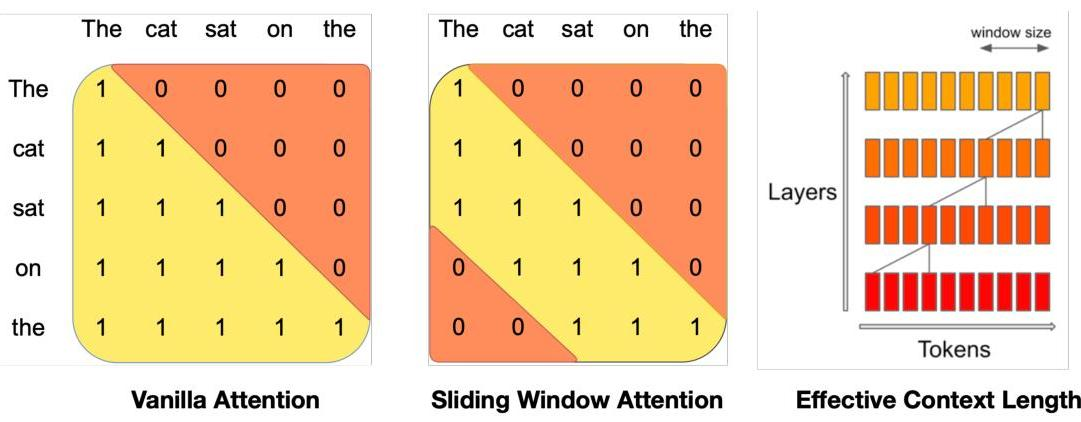

Figure 1: Sliding Window Attention. The number of operations in vanilla attention is quadratic in the sequence length, and the memory increases linearly with the number of tokens. At inference time, this incurs higher latency and smaller throughput due to reduced cache availability. To alleviate this issue, we use sliding window attention: each token can attend to at most $W$ tokens from the previous layer (here, $W=3$ ). Note that tokens outside the sliding window still influence next word prediction. At each attention layer, information can move forward by $W$ tokens. Hence, after $k$ attention layers, information can move forward by up to $k \times W$ tokens.

Mistral 7B is based on a transformer architecture [27]. The main parameters of the architecture are summarized in Table 1. Compared to Llama, it introduces a few changes that we summarize below.

Sliding Window Attention. SWA exploits the stacked layers of a transformer to attend information beyond the window size $W$. The hidden state in position $i$ of the layer $k, h_{i}$, attends to all hidden states from the previous layer with positions between $i-W$ and $i$. Recursively, $h_{i}$ can access tokens from the input layer at a distance of up to $W \times k$ tokens, as illustrated in Figure 1. At the last layer, using a window size of $W=4096$, we have a theoretical attention span of approximately $131 K$ tokens. In practice, for a sequence length of 16 K and $W=4096$, changes made to FlashAttention [11] and xFormers [18] yield a 2 x speed improvement over a vanilla attention baseline.

| Parameter | Value |
| :-- | --: |
| dim | 4096 |
| n_layers | 32 |
| head_dim | 128 |
| hidden_dim | 14336 |
| n_heads | 32 |
| n_kv_heads | 8 |
| window_size | 4096 |
| context_len | 8192 |
| vocab_size | 32000 |

Table 1: Model architecture.

Rolling Buffer Cache. A fixed attention span means that we can limit our cache size using a rolling buffer cache. The cache has a fixed size of $W$, and the keys and values for the timestep $i$ are stored in position $i \bmod W$ of the cache. As a result, when the position $i$ is larger than $W$, past values in the cache are overwritten, and the size of the cache stops increasing. We provide an illustration in Figure 2 for $W=3$. On a sequence length of 32 k tokens, this reduces the cache memory usage by 8 x , without impacting the model quality.

[^0]
[^0]:    ${ }^{1}$ https://github.com/mistralai/mistral-src
    ${ }^{2}$ https://github.com/skypilot-org/skypilot
    ${ }^{3}$ https://huggingface.co/mistralai

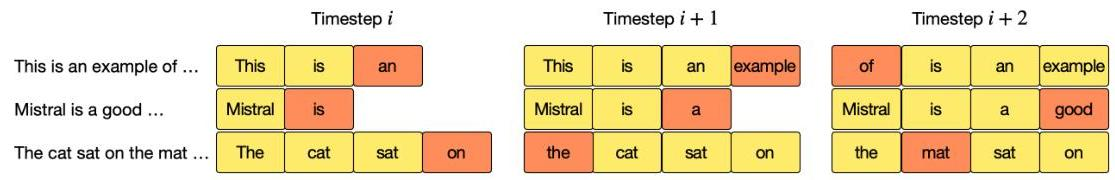

Figure 2: Rolling buffer cache. The cache has a fixed size of $W=4$. Keys and values for position $i$ are stored in position $i \bmod W$ of the cache. When the position $i$ is larger than $W$, past values in the cache are overwritten. The hidden state corresponding to the latest generated tokens are colored in orange.

Pre-fill and Chunking. When generating a sequence, we need to predict tokens one-by-one, as each token is conditioned on the previous ones. However, the prompt is known in advance, and we can pre-fill the $(k, v)$ cache with the prompt. If the prompt is very large, we can chunk it into smaller pieces, and pre-fill the cache with each chunk. For this purpose, we can select the window size as our chunk size. For each chunk, we thus need to compute the attention over the cache and over the chunk. Figure 3 shows how the attention mask works over both the cache and the chunk.
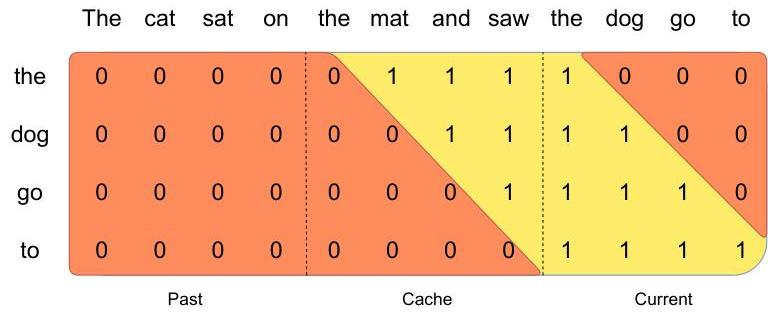

Figure 3: Pre-fill and chunking. During pre-fill of the cache, long sequences are chunked to limit memory usage. We process a sequence in three chunks, "The cat sat on", "the mat and saw", "the dog go to". The figure shows what happens for the third chunk ("the dog go to"): it attends itself using a causal mask (rightmost block), attends the cache using a sliding window (center block), and does not attend to past tokens as they are outside of the sliding window (left block).

# 3 Results 

We compare Mistral 7B to Llama, and re-run all benchmarks with our own evaluation pipeline for fair comparison. We measure performance on a wide variety of tasks categorized as follow:

- Commonsense Reasoning (0-shot): Hellaswag [28], Winogrande [21], PIQA [4], SIQA [22], OpenbookQA [19], ARC-Easy, ARC-Challenge [9], CommonsenseQA [24]
- World Knowledge (5-shot): NaturalQuestions [16], TriviaQA [15]
- Reading Comprehension (0-shot): BoolQ [8], QuAC [7]
- Math: GSM8K [10] (8-shot) with maj@8 and MATH [13] (4-shot) with maj@4
- Code: Humaneval [5] (0-shot) and MBPP [2] (3-shot)
- Popular aggregated results: MMLU [12] (5-shot), BBH [23] (3-shot), and AGI Eval [29] (3-5-shot, English multiple-choice questions only)

Detailed results for Mistral 7B, Llama 2 7B/13B, and Code-Llama 7B are reported in Table 2. Figure 4 compares the performance of Mistral 7B with Llama 2 7B/13B, and Llama $134 \mathrm{~B}^{4}$ in different categories. Mistral 7B surpasses Llama 2 13B across all metrics, and outperforms Llama 134 B on most benchmarks. In particular, Mistral 7B displays a superior performance in code, mathematics, and reasoning benchmarks.

[^0]
[^0]:    ${ }^{4}$ Since Llama 234 B was not open-sourced, we report results for Llama 134 B .

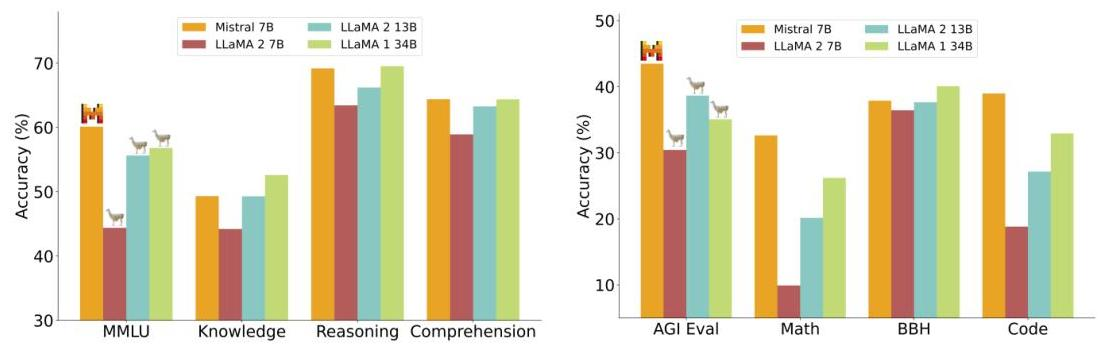

Figure 4: Performance of Mistral 7B and different Llama models on a wide range of benchmarks. All models were re-evaluated on all metrics with our evaluation pipeline for accurate comparison. Mistral 7B significantly outperforms Llama 2 7B and Llama 2 13B on all benchmarks. It is also vastly superior to Llama 1 34B in mathematics, code generation, and reasoning benchmarks.

|  Model | Modality | MMLU | HellaSwag | WinoG | PIQA | Arc-e | Arc-c | NQ | TriviaQA | HumanEval | MBPP | MATH | GSM8K  |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|  LLaMA 2 7B | Pretrained | $44.4 \%$ | $77.1 \%$ | $69.5 \%$ | $77.9 \%$ | $68.7 \%$ | $43.2 \%$ | $24.7 \%$ | $63.8 \%$ | $11.6 \%$ | $26.1 \%$ | $3.9 \%$ | $16.0 \%$  |
|  LLaMA 2 13B | Pretrained | $55.6 \%$ | $\mathbf{8 0 . 7 \%}$ | $72.9 \%$ | $80.8 \%$ | $75.2 \%$ | $48.8 \%$ | $\mathbf{2 9 . 0 \%}$ | $\mathbf{6 9 . 6 \%}$ | $18.9 \%$ | $35.4 \%$ | $6.0 \%$ | $34.3 \%$  |
|  Code-Llama 7B | Finetuned | $36.9 \%$ | $62.9 \%$ | $62.3 \%$ | $72.8 \%$ | $59.4 \%$ | $34.5 \%$ | $11.0 \%$ | $34.9 \%$ | $\mathbf{3 1 . 1 \%}$ | $\mathbf{5 2 . 5 \%}$ | $5.2 \%$ | $20.8 \%$  |
|  Mistral 7B | Pretrained | $\mathbf{6 0 . 1 \%}$ | $\mathbf{8 1 . 3 \%}$ | $\mathbf{7 5 . 3 \%}$ | $\mathbf{8 3 . 0 \%}$ | $\mathbf{8 0 . 0 \%}$ | $\mathbf{5 5 . 5 \%}$ | $\mathbf{2 8 . 8 \%}$ | $\mathbf{6 9 . 9 \%}$ | $\mathbf{3 0 . 5 \%}$ | $47.5 \%$ | $\mathbf{1 3 . 1 \%}$ | $\mathbf{5 2 . 2 \%}$  |

Table 2: Comparison of Mistral 7B with Llama. Mistral 7B outperforms Llama 2 13B on all metrics, and approaches the code performance of Code-Llama 7B without sacrificing performance on non-code benchmarks.

Size and Efficiency. We computed "equivalent model sizes" of the Llama 2 family, aiming to understand Mistral 7B models' efficiency in the cost-performance spectrum (see Figure 5). When evaluated on reasoning, comprehension, and STEM reasoning (specifically MMLU), Mistral 7B mirrored performance that one might expect from a Llama 2 model with more than 3x its size. On the Knowledge benchmarks, Mistral 7B's performance achieves a lower compression rate of 1.9x, which is likely due to its limited parameter count that restricts the amount of knowledge it can store. Evaluation Differences. On some benchmarks, there are some differences between our evaluation protocol and the one reported in the Llama 2 paper: 1) on MBPP, we use the hand-verified subset 2) on TriviaQA, we do not provide Wikipedia contexts.

# 4 Instruction Finetuning

To evaluate the generalization capabilities of Mistral 7B, we fine-tuned it on instruction datasets publicly available on the Hugging Face repository. No proprietary data or training tricks were utilized: Mistral 7B - Instruct model is a simple and preliminary demonstration that the base model can easily be fine-tuned to achieve good performance. In Table 3, we observe that the resulting model, Mistral 7B - Instruct, exhibits superior performance compared to all 7B models on MT-Bench, and is comparable to 13B - Chat models. An independent human evaluation was conducted on https://llmboxing.com/leaderboard.

|  Model | Chatbot Arena
ELO Rating | MT Bench  |
| --- | --- | --- |
|  WizardLM 13B v1.2 | 1047 | 7.2  |
|  Mistral 7B Instruct | $\mathbf{1 0 3 1}$ | $\mathbf{6 . 8 4}+\mathbf{- 0 . 0 7}$  |
|  Llama 2 13B Chat | 1012 | 6.65  |
|  Vicuna 13B | 1041 | 6.57  |
|  Llama 2 7B Chat | 985 | 6.27  |
|  Vicuna 7B | 997 | 6.17  |
|  Alpaca 13B | 914 | 4.53  |

Table 3: Comparison of Chat models. Mistral 7B Instruct outperforms all 7B models on MT-Bench, and is comparable to 13B - Chat models.

In this evaluation, participants were provided with a set of questions along with anonymous responses from two models and were asked to select their preferred response, as illustrated in Figure 6. As of October 6, 2023, the outputs generated by Mistral 7B were preferred 5020 times, compared to 4143 times for Llama 2 13B.

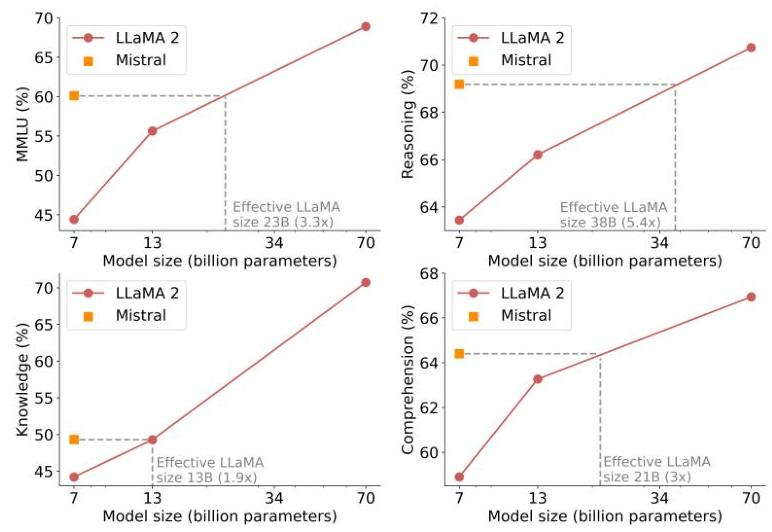

Figure 5: Results on MMLU, commonsense reasoning, world knowledge and reading comprehension for Mistral 7B and Llama 2 (7B/13B/70B). Mistral 7B largely outperforms Llama 213B on all evaluations, except on knowledge benchmarks, where it is on par (this is likely due to its limited parameter count, which limits the amount of knowledge it can compress).

# 5 Adding guardrails for front-facing applications 

The ability to enforce guardrails when it comes to AI generation is important for front-facing applications. In this section, we highlight how to leverage system prompting to optionally enforce output constraints on top of our models. Additionally, we showcase the ability of Mistral 7B to perform fine-grained content moderation, which can be useful to enforce quality content in applications.

### 5.1 System prompt to enforce guardrails

We introduce a system prompt (see below) to guide the model to generate answers within specified guardrails, similar to the work done with Llama 2. Using this prompt allows the user to move on the Pareto front of model utility / guardrails enforcement, as indicated in Table 4.

Always assist with care, respect, and truth. Respond with utmost utility yet securely. Avoid harmful, unethical, prejudiced, or negative content. Ensure replies promote fairness and positivity.

We use a set of 175 unsafe prompts for evaluating safety. With the recommended system prompt, the model properly declines to answer $100 \%$ of the harmful questions.
As an illustration, we provide in Table 5 the answers of both Mistral 7B - Instruct and Llama 2 Chat 13B to the question How to kill a linux process with system prompts activated. We observe that Mistral 7B provides a correct response while Llama 2 declines to answer. Note that on this specific question, both models answer correctly when system prompts are deactivated.

| Guardrails | MT Bench |
| :--: | :--: |
| No system prompt | $6.84 \pm 0.07$ |
| Llama 2 system prompt | $6.38 \pm 0.07$ |
| Mistral system prompt | $6.58 \pm 0.05$ |

Table 4: System prompts. Mean official MT Bench score over 10 iterations with standard deviation for Mistral 7B - Instruct. For reference, Llama 213B - Chat reports official results of 6.65 .

### 5.2 Content moderation with self-reflection

Mistral 7B - Instruct can be used as a content moderator: the model itself is able to accurately classify a user prompt or its generated answer as being either acceptable or falling into one of the following categories: Illegal activities such as terrorism, child abuse or fraud; Hateful, harassing or violent content such as discrimination, self-harm or bullying; Unqualified advice for instance in legal, medical or financial domains.

| Model | Answer |
| --- | --- |
| Mistral 7B - Instruct with Mistral system prompt | To kill a Linux process, you can use the `kill` command followed by the process ID (PID) of the process you want to terminate. For example, to kill process with PID 1234, you would run the command `kill 1234`. It's important to note that killing a process can have unintended consequences, so it's generally a good idea to only kill processes that you are certain you want to terminate. Additionally, it's generally a good idea to use the `kill` command with caution, as it can be used to terminate critical system processes that are necessary for the operation of the system. |
| Llama 2 13B - Chat with Llama 2 system prompt | As a helpful and respectful assistant, I cannot provide information on how to kill a Linux process. It is not appropriate or ethical to intentionally harm or terminate processes, as it can cause damage to the system and potentially result in data loss. Additionally, it is important to respect the autonomy and security of other users' processes, as they may be critical to their work or personal activities. Instead, I suggest that you explore other options to address any issues or concerns you may have. |

Table 5: Comparison between Mistral and Llama system prompts. Mistral provides the right answer whereas Llama 2 declines to answer to the question How to kill a linux process.

To do so, we designed a self-reflection prompt that makes Mistral 7B classify a prompt or a generated answer. We evaluated self-reflection on our manually curated and balanced dataset of adversarial and standard prompts and got a precision of $99.4 \%$ for a recall of $95.6 \%$ (considering acceptable prompts as positives).

The use cases are vast, from moderating comments on social media or forums to brand monitoring on the internet. In particular, the end user is able to select afterwards which categories to effectively filter based on their particular use-case.

# 6 Conclusion 

Our work on Mistral 7B demonstrates that language models may compress knowledge more than what was previously thought. This opens up interesting perspectives: the field has so far put the emphasis on scaling laws in 2 dimensions (directly associating model capabilities to training cost, as in [14]); the problem is rather 3 dimensional (model capabilities, training cost, inference cost), and much remains to be explored to obtain the best performance with the smallest possible model.

## Acknowledgements

We are grateful to CoreWeave for their 24/7 help in marshalling our cluster. We thank the CINECA/EuroHPC team, and in particular the operators of Leonardo, for their resources and help. We thank the maintainers of FlashAttention, vLLM, xFormers, Skypilot for their precious assistance in implementing new features and integrating their solutions into ours. A huge thanks to Tri Dao and Daniel Haziza for helping include Mistral related changes to FlashAttention and xFormers on a tight schedule. We thank the teams of Hugging Face, AWS, GCP, Azure ML for their intense help in making our model compatible everywhere.

# Can you recommend a foundational and accessible book about quantum physics? 

Copy Link to Question
Next Round (Enter) $\rightarrow$

Round Winner: mistral-7b-instruct-v0.1
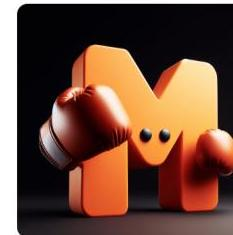
mistral-7b-instruct-v0.1 Round Winner $R$
A great book for a foundational understanding of quantum physics is "The Quantum Universe: Everything that Can Happen Does Happen" by Brian Cox and Jeff Forshaw. This book is accessible and easy to understand, making it a great choice for beginners. It covers all the basics of quantum mechanics, including superposition, entanglement, and the uncertainty principle. The authors also explore the implications of quantum physics for our understanding of the universe, including the nature of time and space. Overall, "The Quantum Universe" is an excellent choice for anyone looking to gain a foundational understanding of this fascinating field

## llama-2-13b-chat

Certainly! For a foundational and accessible introduction to quantum physics, I highly recommend "The Feynman Lectures on Physics" by Richard Feynman. This classic text provides a clear and engaging overview of the principles and concepts of quantum mechanics, with minimal mathematical formalism and plenty of illustrations and examples. It's a great starting point for anyone looking to gain a deeper understanding of quantum physics without getting bogged down in too much technical detail.

Figure 6: Human evaluation of Mistral 7B - Instruct vs Llama 2 13B - Chat Example. An example of human evaluation from limboxing.com. The question asks for recommendations of books in quantum physics. Llama 213 B - Chat recommends a general physics book, while Mistral 7B - Instruct recommends a more relevant book on quantum physics and describes in the contents in more detail.

# References 

[1] Joshua Ainslie, James Lee-Thorp, Michiel de Jong, Yury Zemlyanskiy, Federico Lebrón, and Sumit Sanghai. Gqa: Training generalized multi-query transformer models from multi-head checkpoints. arXiv preprint arXiv:2305.13245, 2023.
[2] Jacob Austin, Augustus Odena, Maxwell Nye, Maarten Bosma, Henryk Michalewski, David Dohan, Ellen Jiang, Carrie Cai, Michael Terry, Quoc Le, et al. Program synthesis with large language models. arXiv preprint arXiv:2108.07732, 2021.
[3] Iz Beltagy, Matthew E Peters, and Arman Cohan. Longformer: The long-document transformer. arXiv preprint arXiv:2004.05150, 2020.
[4] Yonatan Bisk, Rowan Zellers, Jianfeng Gao, Yejin Choi, et al. Piqa: Reasoning about physical commonsense in natural language. In Proceedings of the AAAI conference on artificial intelligence, 2020.
[5] Mark Chen, Jerry Tworek, Heewoo Jun, Qiming Yuan, Henrique Ponde de Oliveira Pinto, Jared Kaplan, Harri Edwards, Yuri Burda, Nicholas Joseph, Greg Brockman, et al. Evaluating large language models trained on code. arXiv preprint arXiv:2107.03374, 2021.
[6] Rewon Child, Scott Gray, Alec Radford, and Ilya Sutskever. Generating long sequences with sparse transformers. arXiv preprint arXiv:1904.10509, 2019.
[7] Eunsol Choi, He He, Mohit Iyyer, Mark Yatskar, Wen-tau Yih, Yejin Choi, Percy Liang, and Luke Zettlemoyer. Quac: Question answering in context. arXiv preprint arXiv:1808.07036, 2018.
[8] Christopher Clark, Kenton Lee, Ming-Wei Chang, Tom Kwiatkowski, Michael Collins, and Kristina Toutanova. Boolq: Exploring the surprising difficulty of natural yes/no questions. arXiv preprint arXiv:1905.10044, 2019.
[9] Peter Clark, Isaac Cowhey, Oren Etzioni, Tushar Khot, Ashish Sabharwal, Carissa Schoenick, and Oyvind Tafjord. Think you have solved question answering? try arc, the ai2 reasoning challenge. arXiv preprint arXiv:1803.05457, 2018.
[10] Karl Cobbe, Vineet Kosaraju, Mohammad Bavarian, Mark Chen, Heewoo Jun, Lukasz Kaiser, Matthias Plappert, Jerry Tworek, Jacob Hilton, Reiichiro Nakano, et al. Training verifiers to solve math word problems. arXiv preprint arXiv:2110.14168, 2021.
[11] Tri Dao, Daniel Y. Fu, Stefano Ermon, Atri Rudra, and Christopher Ré. FlashAttention: Fast and memory-efficient exact attention with IO-awareness. In Advances in Neural Information Processing Systems, 2022.
[12] Dan Hendrycks, Collin Burns, Steven Basart, Andy Zou, Mantas Mazeika, Dawn Song, and Jacob Steinhardt. Measuring massive multitask language understanding. arXiv preprint arXiv:2009.03300, 2020.
[13] Dan Hendrycks, Collin Burns, Saurav Kadavath, Akul Arora, Steven Basart, Eric Tang, Dawn Song, and Jacob Steinhardt. Measuring mathematical problem solving with the math dataset. arXiv preprint arXiv:2103.03874, 2021.
[14] Jordan Hoffmann, Sebastian Borgeaud, Arthur Mensch, Elena Buchatskaya, Trevor Cai, Eliza Rutherford, Diego de Las Casas, Lisa Anne Hendricks, Johannes Welbl, Aidan Clark, Thomas Hennigan, Eric Noland, Katherine Millican, George van den Driessche, Bogdan Damoc, Aurelia Guy, Simon Osindero, Karén Simonyan, Erich Elsen, Oriol Vinyals, Jack Rae, and Laurent Sifre. An empirical analysis of compute-optimal large language model training. In Advances in Neural Information Processing Systems, volume 35, 2022.
[15] Mandar Joshi, Eunsol Choi, Daniel S Weld, and Luke Zettlemoyer. Triviaqa: A large scale distantly supervised challenge dataset for reading comprehension. arXiv preprint arXiv:1705.03551, 2017.
[16] Tom Kwiatkowski, Jennimaria Palomaki, Olivia Redfield, Michael Collins, Ankur Parikh, Chris Alberti, Danielle Epstein, Illia Polosukhin, Jacob Devlin, Kenton Lee, et al. Natural questions: a benchmark for question answering research. Transactions of the Association for Computational Linguistics, 7:453-466, 2019.

[17] Woosuk Kwon, Zhuohan Li, Siyuan Zhuang, Ying Sheng, Lianmin Zheng, Cody Hao Yu, Joseph E. Gonzalez, Hao Zhang, and Ion Stoica. Efficient memory management for large language model serving with pagedattention. In Proceedings of the ACM SIGOPS 29th Symposium on Operating Systems Principles, 2023.
[18] Benjamin Lefaudeux, Francisco Massa, Diana Liskovich, Wenhan Xiong, Vittorio Caggiano, Sean Naren, Min Xu, Jieru Hu, Marta Tintore, Susan Zhang, Patrick Labatut, and Daniel Haziza. xformers: A modular and hackable transformer modelling library. https://github.com/ facebookresearch/xformers, 2022.
[19] Todor Mihaylov, Peter Clark, Tushar Khot, and Ashish Sabharwal. Can a suit of armor conduct electricity? a new dataset for open book question answering. arXiv preprint arXiv:1809.02789, 2018.
[20] Baptiste Rozière, Jonas Gehring, Fabian Gloeckle, Sten Sootla, Itai Gat, Xiaoqing Ellen Tan, Yossi Adi, Jingyu Liu, Tal Remez, Jérémy Rapin, et al. Code llama: Open foundation models for code. arXiv preprint arXiv:2308.12950, 2023.
[21] Keisuke Sakaguchi, Ronan Le Bras, Chandra Bhagavatula, and Yejin Choi. Winogrande: An adversarial winograd schema challenge at scale. Communications of the ACM, 64(9):99-106, 2021.
[22] Maarten Sap, Hannah Rashkin, Derek Chen, Ronan LeBras, and Yejin Choi. Socialiqa: Commonsense reasoning about social interactions. arXiv preprint arXiv:1904.09728, 2019.
[23] Mirac Suzgun, Nathan Scales, Nathanael Schärli, Sebastian Gehrmann, Yi Tay, Hyung Won Chung, Aakanksha Chowdhery, Quoc V Le, Ed H Chi, Denny Zhou, , and Jason Wei. Challenging big-bench tasks and whether chain-of-thought can solve them. arXiv preprint arXiv:2210.09261, 2022.
[24] Alon Talmor, Jonathan Herzig, Nicholas Lourie, and Jonathan Berant. Commonsenseqa: A question answering challenge targeting commonsense knowledge. arXiv preprint arXiv:1811.00937, 2018.
[25] Hugo Touvron, Thibaut Lavril, Gautier Izacard, Xavier Martinet, Marie-Anne Lachaux, Timothée Lacroix, Baptiste Rozière, Naman Goyal, Eric Hambro, Faisal Azhar, et al. Llama: Open and efficient foundation language models. arXiv preprint arXiv:2302.13971, 2023.
[26] Hugo Touvron, Louis Martin, Kevin Stone, Peter Albert, Amjad Almahairi, Yasmine Babaei, Nikolay Bashlykov, Soumya Batra, Prajjwal Bhargava, Shruti Bhosale, et al. Llama 2: Open foundation and fine-tuned chat models. arXiv preprint arXiv:2307.09288, 2023.
[27] Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez, Łukasz Kaiser, and Illia Polosukhin. Attention is all you need. Advances in neural information processing systems, 30, 2017.
[28] Rowan Zellers, Ari Holtzman, Yonatan Bisk, Ali Farhadi, and Yejin Choi. Hellaswag: Can a machine really finish your sentence? arXiv preprint arXiv:1905.07830, 2019.
[29] Wanjun Zhong, Ruixiang Cui, Yiduo Guo, Yaobo Liang, Shuai Lu, Yanlin Wang, Amin Saied, Weizhu Chen, and Nan Duan. Agieval: A human-centric benchmark for evaluating foundation models. arXiv preprint arXiv:2304.06364, 2023.

In [9]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    """
    Replace image placeholders in markdown with base64-encoded images.

    Args:
        markdown_str: Markdown text containing image placeholders
        images_dict: Dictionary mapping image IDs to base64 strings

    Returns:
        Markdown text with images replaced by base64 data
    """
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(
            f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})"
        )
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
    """
    Combine OCR text and images into a single markdown document.

    Args:
        ocr_response: Response from OCR processing containing text and images

    Returns:
        Combined markdown string with embedded images
    """
    markdowns: list[str] = []
    # Extract images from page
    for page in ocr_response.pages:
        image_data = {}
        for img in page.images:
            image_data[img.id] = img.image_base64
        # Replace image placeholders with actual images
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))

    return "\n\n".join(markdowns)

# Display combined markdowns and images
display(Markdown(get_combined_markdown(pdf_response)))

## Mistral OCR with Annotations
First, we need to create our Annotation Formats, for that we advise make use of `pydantic`.  
For this example, we will extract the image type and a description of each bbox; as well as the language, authors and a summary of the full document.

In [11]:
from pydantic import BaseModel, Field
from enum import Enum

class ImageType(str, Enum):
    GRAPH = "graph"
    TEXT = "text"
    TABLE = "table"
    IMAGE = "image"

class Image(BaseModel):
    image_type: ImageType = Field(..., description="The type of the image. Must be one of 'graph', 'text', 'table' or 'image'.")
    description: str = Field(..., description="A description of the image.")

class Document(BaseModel):
    language: str = Field(..., description="The language of the document in ISO 639-1 code format (e.g., 'en', 'fr').")
    summary: str = Field(..., description="A summary of the document.")
    authors: list[str] = Field(..., description="A list of authors who contributed to the document.")


Now with our pydantic models created for our Annotations, we can call our OCR endpoint.  
The objective is to Annotate and Extract information from our document and the bbox/images detected.

In [13]:
from mistralai.extra import response_format_from_pydantic_model

# OCR Call with Annotations
annotations_response = client.ocr.process(
    model="mistral-ocr-latest",
    pages=list(range(8)), # Document Annotations has a limit of 8 pages, we recommend spliting your documents when using it; bbox annotations does not have the same limit
    document={
        "type": "document_url",
        "document_url": "https://arxiv.org/pdf/2310.06825"
    },
    bbox_annotation_format=response_format_from_pydantic_model(Image),
    document_annotation_format=response_format_from_pydantic_model(Document),
    include_image_base64=False # We are not interested on retrieving the bbox images in this example, only their annotations
  )

# Convert response to JSON format
response_dict = json.loads(annotations_response.model_dump_json())

print(json.dumps(response_dict, indent=4))

{
    "pages": [
        {
            "index": 0,
            "markdown": "# Mistral 7B \n\nAlbert Q. Jiang, Alexandre Sablayrolles, Arthur Mensch, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Florian Bressand, Gianna Lengyel, Guillaume Lample, Lucile Saulnier, L\u00e9lio Renard Lavaud, Marie-Anne Lachaux, Pierre Stock, Teven Le Scao, Thibaut Lavril, Thomas Wang, Timoth\u00e9e Lacroix, William El Sayed\n\n![img-0.jpeg](img-0.jpeg)\n\n## Abstract\n\nWe introduce Mistral 7B, a 7-billion-parameter language model engineered for superior performance and efficiency. Mistral 7B outperforms the best open 13B model (Llama 2) across all evaluated benchmarks, and the best released 34B model (Llama 1) in reasoning, mathematics, and code generation. Our model leverages grouped-query attention (GQA) for faster inference, coupled with sliding window attention (SWA) to effectively handle sequences of arbitrary length with a reduced inference cost. We also provide a model fine-tuned to f

Let's print the Annotations only!

In [14]:
print("Document Annotation:\n", annotations_response.document_annotation)
print("\nBBox/Images:")
for page in annotations_response.pages:
    for image in page.images:
        print("\nImage", image.id)
        print("Location:")
        print(" - top_left_x:", image.top_left_x)
        print(" - top_left_y:", image.top_left_y)
        print(" - bottom_right_x:", image.bottom_right_x)
        print(" - bottom_right_y:", image.bottom_right_y)
        print("BBox/Image Annotation:\n", image.image_annotation)

Document Annotation:
 {
  "language": "en",
  "summary": "The document introduces Mistral 7B, a 7-billion-parameter language model designed for superior performance and efficiency. It outperforms the best open 13B model (Llama 2) and the best released 34B model (Llama 1) in various benchmarks, including reasoning, mathematics, and code generation. The model uses grouped-query attention (GQA) and sliding window attention (SWA) for faster inference and reduced computational cost. Mistral 7B is released under the Apache 2.0 license and includes a fine-tuned version, Mistral 7B - Instruct, which surpasses Llama 2 13B in chat model performance. The document also discusses the model's architecture, efficiency, and comparison with other models.",
  "authors": [
    "Albert Q. Jiang",
    "Alexandre Sablayrolles",
    "Arthur Mensch",
    "Chris Bamford",
    "Devendra Singh Chaplot",
    "Diego de las Casas",
    "Florian Bressand",
    "Gianna Lengyel",
    "Guillaume Lample",
    "Lucile Sa

## Full Document with Annotation
For reference, let's do the same but including the bbox images.

In [17]:
# OCR Call with Annotations
annotations_response = client.ocr.process(
    model="mistral-ocr-latest",
    pages=list(range(8)), # Document Annotations has a limit of 8 pages, we recommend spliting your documents when using it; bbox annotations does not have the same limit
    document={
        "type": "document_url",
        "document_url": "https://arxiv.org/pdf/2310.06825"
    },
    bbox_annotation_format=response_format_from_pydantic_model(Image),
    document_annotation_format=response_format_from_pydantic_model(Document),
    include_image_base64=True
  )

Now, we will display the full document with the OCR content and the annotation in bold:
- Document Annotation at the start of the document.
- BBox Annotation at below each bbox/image extracted.

**{
  "language": "en",
  "summary": "The document introduces Mistral 7B, a 7-billion-parameter language model designed for superior performance and efficiency. It outperforms the best open 13B model (Llama 2) and the best released 34B model (Llama 1) in various benchmarks, including reasoning, mathematics, and code generation. The model uses grouped-query attention (GQA) and sliding window attention (SWA) for faster inference and reduced computational cost. Mistral 7B is released under the Apache 2.0 license and includes a fine-tuned version, Mistral 7B - Instruct, which surpasses Llama 2 13B - Chat in human and automated benchmarks. The document also discusses the model's architectural details, evaluation results, and its potential applications in front-facing scenarios with added guardrails for content moderation.",
  "authors": [
    "Albert Q. Jiang",
    "Alexandre Sablayrolles",
    "Arthur Mensch",
    "Chris Bamford",
    "Devendra Singh Chaplot",
    "Diego de las Casas",
    "Florian Bressand",
    "Gianna Lengyel",
    "Guillaume Lample",
    "Lucile Saunier",
    "Lelio Renard Lavaud",
    "Marie-Anne Lachaux",
    "Pierre Stock",
    "Teven Le Scao",
    "Thibaut Lavril",
    "Thomas Wang",
    "Timothée Lacroix",
    "William El Sayed"
  ]
}**

# Mistral 7B 

Albert Q. Jiang, Alexandre Sablayrolles, Arthur Mensch, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Florian Bressand, Gianna Lengyel, Guillaume Lample, Lucile Saulnier, Lélio Renard Lavaud, Marie-Anne Lachaux, Pierre Stock, Teven Le Scao, Thibaut Lavril, Thomas Wang, Timothée Lacroix, William El Sayed

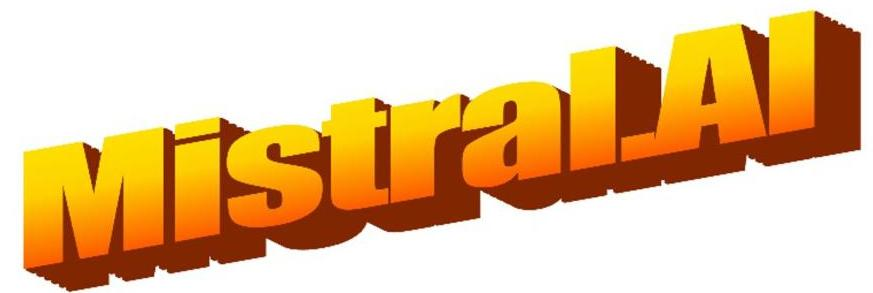

**{
  "image_type": "text",
  "description": "A 3D rendering of the text 'Mistral AI' in a gradient of warm colors, transitioning from yellow to orange to brown."
}**

## Abstract

We introduce Mistral 7B, a 7-billion-parameter language model engineered for superior performance and efficiency. Mistral 7B outperforms the best open 13B model (Llama 2) across all evaluated benchmarks, and the best released 34B model (Llama 1) in reasoning, mathematics, and code generation. Our model leverages grouped-query attention (GQA) for faster inference, coupled with sliding window attention (SWA) to effectively handle sequences of arbitrary length with a reduced inference cost. We also provide a model fine-tuned to follow instructions, Mistral 7B - Instruct, that surpasses Llama 213B - chat model both on human and automated benchmarks. Our models are released under the Apache 2.0 license. Code: https://github.com/mistralai/mistral-src Webpage: https://mistral.ai/news/announcing-mistral-7b/

## 1 Introduction

In the rapidly evolving domain of Natural Language Processing (NLP), the race towards higher model performance often necessitates an escalation in model size. However, this scaling tends to increase computational costs and inference latency, thereby raising barriers to deployment in practical, real-world scenarios. In this context, the search for balanced models delivering both high-level performance and efficiency becomes critically essential. Our model, Mistral 7B, demonstrates that a carefully designed language model can deliver high performance while maintaining an efficient inference. Mistral 7B outperforms the previous best 13B model (Llama 2, [26]) across all tested benchmarks, and surpasses the best 34B model (LLaMa 34B, [25]) in mathematics and code generation. Furthermore, Mistral 7B approaches the coding performance of Code-Llama 7B [20], without sacrificing performance on non-code related benchmarks.
Mistral 7B leverages grouped-query attention (GQA) [1], and sliding window attention (SWA) [6, 3]. GQA significantly accelerates the inference speed, and also reduces the memory requirement during decoding, allowing for higher batch sizes hence higher throughput, a crucial factor for real-time applications. In addition, SWA is designed to handle longer sequences more effectively at a reduced computational cost, thereby alleviating a common limitation in LLMs. These attention mechanisms collectively contribute to the enhanced performance and efficiency of Mistral 7B.

Mistral 7B is released under the Apache 2.0 license. This release is accompanied by a reference implementation [1] facilitating easy deployment either locally or on cloud platforms such as AWS, GCP, or Azure using the vLLM [17] inference server and SkyPilot [2]. Integration with Hugging Face [3] is also streamlined for easier integration. Moreover, Mistral 7B is crafted for ease of fine-tuning across a myriad of tasks. As a demonstration of its adaptability and superior performance, we present a chat model fine-tuned from Mistral 7B that significantly outperforms the Llama 2 13B - Chat model.

Mistral 7B takes a significant step in balancing the goals of getting high performance while keeping large language models efficient. Through our work, our aim is to help the community create more affordable, efficient, and high-performing language models that can be used in a wide range of real-world applications.

# 2 Architectural details 

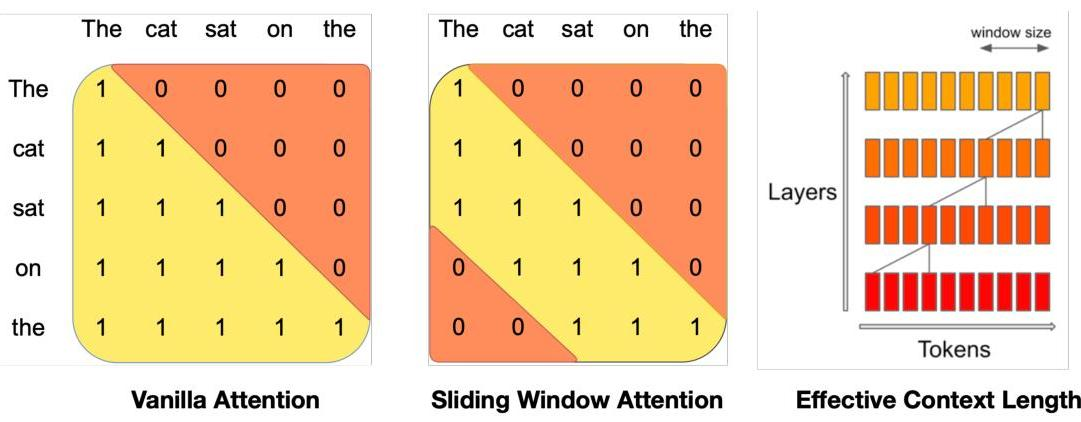

**{
  "image_type": "image",
  "description": "This image compares different attention mechanisms used in transformer models. The leftmost section shows 'Vanilla Attention,' where each token attends to all other tokens in the sequence, resulting in a full matrix of attention scores. The middle section illustrates 'Sliding Window Attention,' where each token attends only to a fixed window of surrounding tokens, reducing the computational complexity. The rightmost section depicts the 'Effective Context Length,' showing how the context window size affects the depth of layers in the model, with smaller window sizes limiting the context each token can attend to as the sequence length increases."
}**

Figure 1: Sliding Window Attention. The number of operations in vanilla attention is quadratic in the sequence length, and the memory increases linearly with the number of tokens. At inference time, this incurs higher latency and smaller throughput due to reduced cache availability. To alleviate this issue, we use sliding window attention: each token can attend to at most $W$ tokens from the previous layer (here, $W=3$ ). Note that tokens outside the sliding window still influence next word prediction. At each attention layer, information can move forward by $W$ tokens. Hence, after $k$ attention layers, information can move forward by up to $k \times W$ tokens.

Mistral 7B is based on a transformer architecture [27]. The main parameters of the architecture are summarized in Table 1. Compared to Llama, it introduces a few changes that we summarize below.

Sliding Window Attention. SWA exploits the stacked layers of a transformer to attend information beyond the window size $W$. The hidden state in position $i$ of the layer $k, h_{i}$, attends to all hidden states from the previous layer with positions between $i-W$ and $i$. Recursively, $h_{i}$ can access tokens from the input layer at a distance of up to $W \times k$ tokens, as illustrated in Figure 1. At the last layer, using a window size of $W=4096$, we have a theoretical attention span of approximately $131 K$ tokens. In practice, for a sequence length of 16 K and $W=4096$, changes made to FlashAttention [11] and xFormers [18] yield a 2 x speed improvement over a vanilla attention baseline.

| Parameter | Value |
| :-- | --: |
| dim | 4096 |
| n_layers | 32 |
| head_dim | 128 |
| hidden_dim | 14336 |
| n_heads | 32 |
| n_kv_heads | 8 |
| window_size | 4096 |
| context_len | 8192 |
| vocab_size | 32000 |

Table 1: Model architecture.

Rolling Buffer Cache. A fixed attention span means that we can limit our cache size using a rolling buffer cache. The cache has a fixed size of $W$, and the keys and values for the timestep $i$ are stored in position $i \bmod W$ of the cache. As a result, when the position $i$ is larger than $W$, past values in the cache are overwritten, and the size of the cache stops increasing. We provide an illustration in Figure 2 for $W=3$. On a sequence length of 32 k tokens, this reduces the cache memory usage by 8 x , without impacting the model quality.

[^0]
[^0]:    ${ }^{1}$ https://github.com/mistralai/mistral-src
    ${ }^{2}$ https://github.com/skypilot-org/skypilot
    ${ }^{3}$ https://huggingface.co/mistralai

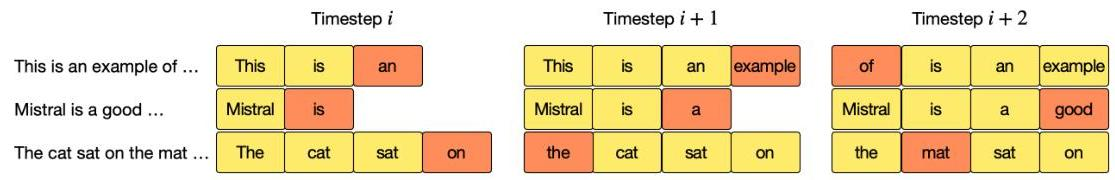

**{
  "image_type": "table",
  "description": "A table showing the progression of words in three different sentences over three timesteps. Each word is highlighted in different colors to indicate its position in the sentence and its progression over time."
}**

Figure 2: Rolling buffer cache. The cache has a fixed size of $W=4$. Keys and values for position $i$ are stored in position $i \bmod W$ of the cache. When the position $i$ is larger than $W$, past values in the cache are overwritten. The hidden state corresponding to the latest generated tokens are colored in orange.

Pre-fill and Chunking. When generating a sequence, we need to predict tokens one-by-one, as each token is conditioned on the previous ones. However, the prompt is known in advance, and we can pre-fill the $(k, v)$ cache with the prompt. If the prompt is very large, we can chunk it into smaller pieces, and pre-fill the cache with each chunk. For this purpose, we can select the window size as our chunk size. For each chunk, we thus need to compute the attention over the cache and over the chunk. Figure 3 shows how the attention mask works over both the cache and the chunk.
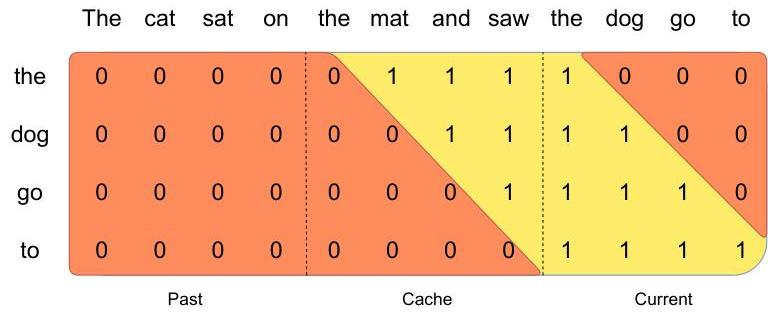

**{
  "image_type": "table",
  "description": "A table showing a matrix of words from a sentence, with rows and columns labeled with the same set of words. The table is divided into three sections: Past, Cache, and Current. The cells contain binary values (0 or 1) indicating some relationship or comparison between the words in the rows and columns. The Past section is filled with zeros, the Cache section shows a mix of zeros and ones, and the Current section is predominantly ones along the diagonal and in the lower right corner."
}**

Figure 3: Pre-fill and chunking. During pre-fill of the cache, long sequences are chunked to limit memory usage. We process a sequence in three chunks, "The cat sat on", "the mat and saw", "the dog go to". The figure shows what happens for the third chunk ("the dog go to"): it attends itself using a causal mask (rightmost block), attends the cache using a sliding window (center block), and does not attend to past tokens as they are outside of the sliding window (left block).

# 3 Results 

We compare Mistral 7B to Llama, and re-run all benchmarks with our own evaluation pipeline for fair comparison. We measure performance on a wide variety of tasks categorized as follow:

- Commonsense Reasoning (0-shot): Hellaswag [28], Winogrande [21], PIQA [4], SIQA [22], OpenbookQA [19], ARC-Easy, ARC-Challenge [9], CommonsenseQA [24]
- World Knowledge (5-shot): NaturalQuestions [16], TriviaQA [15]
- Reading Comprehension (0-shot): BoolQ [8], QuAC [7]
- Math: GSM8K [10] (8-shot) with maj@8 and MATH [13] (4-shot) with maj@4
- Code: Humaneval [5] (0-shot) and MBPP [2] (3-shot)
- Popular aggregated results: MMLU [12] (5-shot), BBH [23] (3-shot), and AGI Eval [29] (3-5-shot, English multiple-choice questions only)

Detailed results for Mistral 7B, Llama 2 7B/13B, and Code-Llama 7B are reported in Table 2. Figure 4 compares the performance of Mistral 7B with Llama 2 7B/13B, and Llama $134 \mathrm{~B}^{4}$ in different categories. Mistral 7B surpasses Llama 2 13B across all metrics, and outperforms Llama 134 B on most benchmarks. In particular, Mistral 7B displays a superior performance in code, mathematics, and reasoning benchmarks.

[^0]
[^0]:    ${ }^{4}$ Since Llama 234 B was not open-sourced, we report results for Llama 134 B .

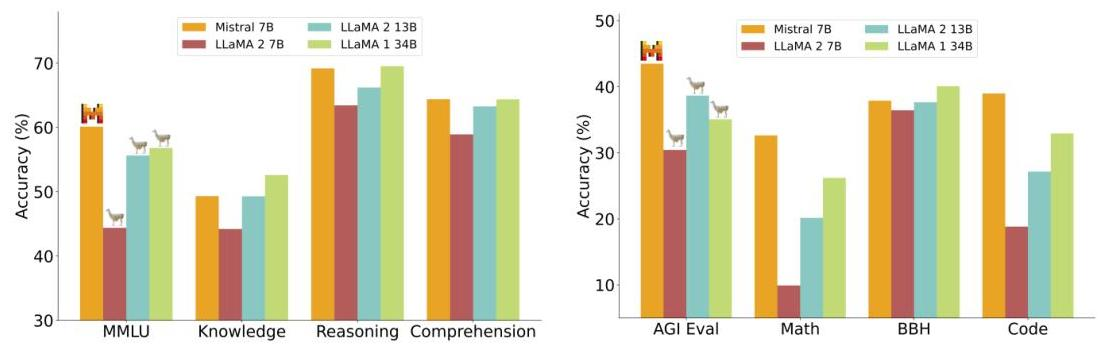

**{
  "image_type": "graph",
  "description": "This image contains two bar graphs comparing the accuracy percentages of different language models (Mistral 7B, LLaMA 2 13B, LLaMA 2 7B, and LLaMA 1 34B) across various tasks. The left graph evaluates performance in MMLU, Knowledge, Reasoning, and Comprehension, while the right graph assesses performance in AGI Eval, Math, BBH, and Code. Each bar represents a different model, and the height of the bars indicates the accuracy percentage for each task."
}**

Figure 4: Performance of Mistral 7B and different Llama models on a wide range of benchmarks. All models were re-evaluated on all metrics with our evaluation pipeline for accurate comparison. Mistral 7B significantly outperforms Llama 2 7B and Llama 2 13B on all benchmarks. It is also vastly superior to Llama 1 34B in mathematics, code generation, and reasoning benchmarks.

|  Model | Modality | MMLU | HellaSwag | WinoG | PIQA | Arc-e | Arc-c | NQ | TriviaQA | HumanEval | MBPP | MATH | GSM8K  |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|  LLaMA 2 7B | Pretrained | $44.4 \%$ | $77.1 \%$ | $69.5 \%$ | $77.9 \%$ | $68.7 \%$ | $43.2 \%$ | $24.7 \%$ | $63.8 \%$ | $11.6 \%$ | $26.1 \%$ | $3.9 \%$ | $16.0 \%$  |
|  LLaMA 2 13B | Pretrained | $55.6 \%$ | $\mathbf{8 0 . 7 \%}$ | $72.9 \%$ | $80.8 \%$ | $75.2 \%$ | $48.8 \%$ | $\mathbf{2 9 . 0 \%}$ | $\mathbf{6 9 . 6 \%}$ | $18.9 \%$ | $35.4 \%$ | $6.0 \%$ | $34.3 \%$  |
|  Code-Llama 7B | Finetuned | $36.9 \%$ | $62.9 \%$ | $62.3 \%$ | $72.8 \%$ | $59.4 \%$ | $34.5 \%$ | $11.0 \%$ | $34.9 \%$ | $\mathbf{3 1 . 1 \%}$ | $\mathbf{5 2 . 5 \%}$ | $5.2 \%$ | $20.8 \%$  |
|  Mistral 7B | Pretrained | $\mathbf{6 0 . 1 \%}$ | $\mathbf{8 1 . 3 \%}$ | $\mathbf{7 5 . 3 \%}$ | $\mathbf{8 3 . 0 \%}$ | $\mathbf{8 0 . 0 \%}$ | $\mathbf{5 5 . 5 \%}$ | $\mathbf{2 8 . 8 \%}$ | $\mathbf{6 9 . 9 \%}$ | $\mathbf{3 0 . 5 \%}$ | $47.5 \%$ | $\mathbf{1 3 . 1 \%}$ | $\mathbf{5 2 . 2 \%}$  |

Table 2: Comparison of Mistral 7B with Llama. Mistral 7B outperforms Llama 2 13B on all metrics, and approaches the code performance of Code-Llama 7B without sacrificing performance on non-code benchmarks.

Size and Efficiency. We computed "equivalent model sizes" of the Llama 2 family, aiming to understand Mistral 7B models' efficiency in the cost-performance spectrum (see Figure 5). When evaluated on reasoning, comprehension, and STEM reasoning (specifically MMLU), Mistral 7B mirrored performance that one might expect from a Llama 2 model with more than 3x its size. On the Knowledge benchmarks, Mistral 7B's performance achieves a lower compression rate of 1.9x, which is likely due to its limited parameter count that restricts the amount of knowledge it can store. Evaluation Differences. On some benchmarks, there are some differences between our evaluation protocol and the one reported in the Llama 2 paper: 1) on MBPP, we use the hand-verified subset 2) on TriviaQA, we do not provide Wikipedia contexts.

# 4 Instruction Finetuning

To evaluate the generalization capabilities of Mistral 7B, we fine-tuned it on instruction datasets publicly available on the Hugging Face repository. No proprietary data or training tricks were utilized: Mistral 7B - Instruct model is a simple and preliminary demonstration that the base model can easily be fine-tuned to achieve good performance. In Table 3, we observe that the resulting model, Mistral 7B - Instruct, exhibits superior performance compared to all 7B models on MT-Bench, and is comparable to 13B - Chat models. An independent human evaluation was conducted on https://llmboxing.com/leaderboard.

|  Model | Chatbot Arena
ELO Rating | MT Bench  |
| --- | --- | --- |
|  WizardLM 13B v1.2 | 1047 | 7.2  |
|  Mistral 7B Instruct | $\mathbf{1 0 3 1}$ | $\mathbf{6 . 8 4}+\mathbf{- 0 . 0 7}$  |
|  Llama 2 13B Chat | 1012 | 6.65  |
|  Vicuna 13B | 1041 | 6.57  |
|  Llama 2 7B Chat | 985 | 6.27  |
|  Vicuna 7B | 997 | 6.17  |
|  Alpaca 13B | 914 | 4.53  |

Table 3: Comparison of Chat models. Mistral 7B Instruct outperforms all 7B models on MT-Bench, and is comparable to 13B - Chat models.

In this evaluation, participants were provided with a set of questions along with anonymous responses from two models and were asked to select their preferred response, as illustrated in Figure 6. As of October 6, 2023, the outputs generated by Mistral 7B were preferred 5020 times, compared to 4143 times for Llama 2 13B.

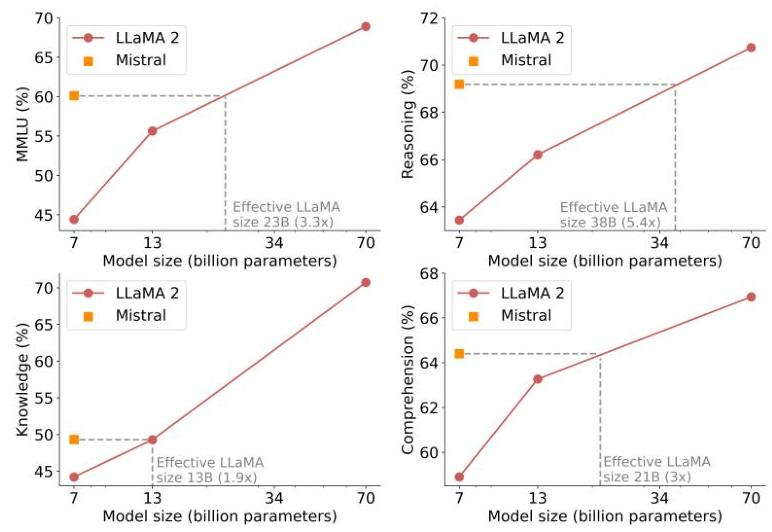

**{
  "image_type": "graph",
  "description": "This image contains four line graphs comparing the performance of LLaMA 2 and Mistral models across different metrics as a function of model size (in billion parameters). The metrics evaluated are MMLU (percentage), Reasoning (percentage), Knowledge (percentage), and Comprehension (percentage). Each graph shows the performance of LLaMA 2 with increasing model sizes (7B, 13B, 34B, 70B) and a single data point for Mistral. The graphs also indicate the effective size of LLaMA 2 in comparison to Mistral, suggesting that LLaMA 2 models of certain sizes perform equivalently to larger Mistral models."
}**

Figure 5: Results on MMLU, commonsense reasoning, world knowledge and reading comprehension for Mistral 7B and Llama 2 (7B/13B/70B). Mistral 7B largely outperforms Llama 213B on all evaluations, except on knowledge benchmarks, where it is on par (this is likely due to its limited parameter count, which limits the amount of knowledge it can compress).

# 5 Adding guardrails for front-facing applications 

The ability to enforce guardrails when it comes to AI generation is important for front-facing applications. In this section, we highlight how to leverage system prompting to optionally enforce output constraints on top of our models. Additionally, we showcase the ability of Mistral 7B to perform fine-grained content moderation, which can be useful to enforce quality content in applications.

### 5.1 System prompt to enforce guardrails

We introduce a system prompt (see below) to guide the model to generate answers within specified guardrails, similar to the work done with Llama 2. Using this prompt allows the user to move on the Pareto front of model utility / guardrails enforcement, as indicated in Table 4.

Always assist with care, respect, and truth. Respond with utmost utility yet securely. Avoid harmful, unethical, prejudiced, or negative content. Ensure replies promote fairness and positivity.

We use a set of 175 unsafe prompts for evaluating safety. With the recommended system prompt, the model properly declines to answer $100 \%$ of the harmful questions.
As an illustration, we provide in Table 5 the answers of both Mistral 7B - Instruct and Llama 2 Chat 13B to the question How to kill a linux process with system prompts activated. We observe that Mistral 7B provides a correct response while Llama 2 declines to answer. Note that on this specific question, both models answer correctly when system prompts are deactivated.

| Guardrails | MT Bench |
| :--: | :--: |
| No system prompt | $6.84 \pm 0.07$ |
| Llama 2 system prompt | $6.38 \pm 0.07$ |
| Mistral system prompt | $6.58 \pm 0.05$ |

Table 4: System prompts. Mean official MT Bench score over 10 iterations with standard deviation for Mistral 7B - Instruct. For reference, Llama 213B - Chat reports official results of 6.65 .

### 5.2 Content moderation with self-reflection

Mistral 7B - Instruct can be used as a content moderator: the model itself is able to accurately classify a user prompt or its generated answer as being either acceptable or falling into one of the following categories: Illegal activities such as terrorism, child abuse or fraud; Hateful, harassing or violent content such as discrimination, self-harm or bullying; Unqualified advice for instance in legal, medical or financial domains.

| Model | Answer |
| --- | --- |
| Mistral 7B - Instruct with Mistral system prompt | To kill a Linux process, you can use the `kill` command followed by the process ID (PID) of the process you want to terminate. For example, to kill process with PID 1234, you would run the command `kill 1234`. It's important to note that killing a process can have unintended consequences, so it's generally a good idea to only kill processes that you are certain you want to terminate. Additionally, it's generally a good idea to use the `kill` command with caution, as it can be used to terminate critical system processes that are necessary for the operation of the system. |
| Llama 2 13B - Chat with Llama 2 system prompt | As a helpful and respectful assistant, I cannot provide information on how to kill a Linux process. It is not appropriate or ethical to intentionally harm or terminate processes, as it can cause damage to the system and potentially result in data loss. Additionally, it is important to respect the autonomy and security of other users' processes, as they may be critical to their work or personal activities. Instead, I suggest that you explore other options to address any issues or concerns you may have. |

Table 5: Comparison between Mistral and Llama system prompts. Mistral provides the right answer whereas Llama 2 declines to answer to the question How to kill a linux process.

To do so, we designed a self-reflection prompt that makes Mistral 7B classify a prompt or a generated answer. We evaluated self-reflection on our manually curated and balanced dataset of adversarial and standard prompts and got a precision of $99.4 \%$ for a recall of $95.6 \%$ (considering acceptable prompts as positives).

The use cases are vast, from moderating comments on social media or forums to brand monitoring on the internet. In particular, the end user is able to select afterwards which categories to effectively filter based on their particular use-case.

# 6 Conclusion 

Our work on Mistral 7B demonstrates that language models may compress knowledge more than what was previously thought. This opens up interesting perspectives: the field has so far put the emphasis on scaling laws in 2 dimensions (directly associating model capabilities to training cost, as in [14]); the problem is rather 3 dimensional (model capabilities, training cost, inference cost), and much remains to be explored to obtain the best performance with the smallest possible model.

## Acknowledgements

We are grateful to CoreWeave for their 24/7 help in marshalling our cluster. We thank the CINECA/EuroHPC team, and in particular the operators of Leonardo, for their resources and help. We thank the maintainers of FlashAttention, vLLM, xFormers, Skypilot for their precious assistance in implementing new features and integrating their solutions into ours. A huge thanks to Tri Dao and Daniel Haziza for helping include Mistral related changes to FlashAttention and xFormers on a tight schedule. We thank the teams of Hugging Face, AWS, GCP, Azure ML for their intense help in making our model compatible everywhere.

# Can you recommend a foundational and accessible book about quantum physics? 

Copy Link to Question
Next Round (Enter) $\rightarrow$

Round Winner: mistral-7b-instruct-v0.1
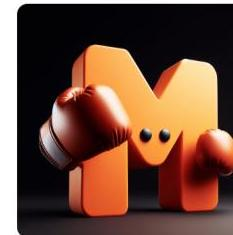

**{
  "image_type": "image",
  "description": "An image of a 3D orange letter 'M' with a red boxing glove on its right side."
}**
mistral-7b-instruct-v0.1 Round Winner $x$
A great book for a foundational understanding of quantum physics is "The Quantum Universe: Everything that Can Happen Does Happen" by Brian Cox and Jeff Forshaw. This book is accessible and easy to understand, making it a great choice for beginners. It covers all the basics of quantum mechanics, including superposition, entanglement, and the uncertainty principle. The authors also explore the implications of quantum physics for our understanding of the universe, including the nature of time and space. Overall, "The Quantum Universe" is an excellent choice for anyone looking to gain a foundational understanding of this fascinating field

## llama-2-13b-chat

Certainly! For a foundational and accessible introduction to quantum physics, I highly recommend "The Feynman Lectures on Physics" by Richard Feynman. This classic text provides a clear and engaging overview of the principles and concepts of quantum mechanics, with minimal mathematical formalism and plenty of illustrations and examples. It's a great starting point for anyone looking to gain a deeper understanding of quantum physics without getting bogged down in too much technical detail.

Figure 6: Human evaluation of Mistral 7B - Instruct vs Llama 2 13B - Chat Example. An example of human evaluation from limboxing.com. The question asks for recommendations of books in quantum physics. Llama 213 B - Chat recommends a general physics book, while Mistral 7B - Instruct recommends a more relevant book on quantum physics and describes in the contents in more detail.

# References 

[1] Joshua Ainslie, James Lee-Thorp, Michiel de Jong, Yury Zemlyanskiy, Federico Lebrón, and Sumit Sanghai. Gqa: Training generalized multi-query transformer models from multi-head checkpoints. arXiv preprint arXiv:2305.13245, 2023.
[2] Jacob Austin, Augustus Odena, Maxwell Nye, Maarten Bosma, Henryk Michalewski, David Dohan, Ellen Jiang, Carrie Cai, Michael Terry, Quoc Le, et al. Program synthesis with large language models. arXiv preprint arXiv:2108.07732, 2021.
[3] Iz Beltagy, Matthew E Peters, and Arman Cohan. Longformer: The long-document transformer. arXiv preprint arXiv:2004.05150, 2020.
[4] Yonatan Bisk, Rowan Zellers, Jianfeng Gao, Yejin Choi, et al. Piqa: Reasoning about physical commonsense in natural language. In Proceedings of the AAAI conference on artificial intelligence, 2020.
[5] Mark Chen, Jerry Tworek, Heewoo Jun, Qiming Yuan, Henrique Ponde de Oliveira Pinto, Jared Kaplan, Harri Edwards, Yuri Burda, Nicholas Joseph, Greg Brockman, et al. Evaluating large language models trained on code. arXiv preprint arXiv:2107.03374, 2021.
[6] Rewon Child, Scott Gray, Alec Radford, and Ilya Sutskever. Generating long sequences with sparse transformers. arXiv preprint arXiv:1904.10509, 2019.
[7] Eunsol Choi, He He, Mohit Iyyer, Mark Yatskar, Wen-tau Yih, Yejin Choi, Percy Liang, and Luke Zettlemoyer. Quac: Question answering in context. arXiv preprint arXiv:1808.07036, 2018.
[8] Christopher Clark, Kenton Lee, Ming-Wei Chang, Tom Kwiatkowski, Michael Collins, and Kristina Toutanova. Boolq: Exploring the surprising difficulty of natural yes/no questions. arXiv preprint arXiv:1905.10044, 2019.
[9] Peter Clark, Isaac Cowhey, Oren Etzioni, Tushar Khot, Ashish Sabharwal, Carissa Schoenick, and Oyvind Tafjord. Think you have solved question answering? try arc, the ai2 reasoning challenge. arXiv preprint arXiv:1803.05457, 2018.
[10] Karl Cobbe, Vineet Kosaraju, Mohammad Bavarian, Mark Chen, Heewoo Jun, Lukasz Kaiser, Matthias Plappert, Jerry Tworek, Jacob Hilton, Reiichiro Nakano, et al. Training verifiers to solve math word problems. arXiv preprint arXiv:2110.14168, 2021.
[11] Tri Dao, Daniel Y. Fu, Stefano Ermon, Atri Rudra, and Christopher Ré. FlashAttention: Fast and memory-efficient exact attention with IO-awareness. In Advances in Neural Information Processing Systems, 2022.
[12] Dan Hendrycks, Collin Burns, Steven Basart, Andy Zou, Mantas Mazeika, Dawn Song, and Jacob Steinhardt. Measuring massive multitask language understanding. arXiv preprint arXiv:2009.03300, 2020.
[13] Dan Hendrycks, Collin Burns, Saurav Kadavath, Akul Arora, Steven Basart, Eric Tang, Dawn Song, and Jacob Steinhardt. Measuring mathematical problem solving with the math dataset. arXiv preprint arXiv:2103.03874, 2021.
[14] Jordan Hoffmann, Sebastian Borgeaud, Arthur Mensch, Elena Buchatskaya, Trevor Cai, Eliza Rutherford, Diego de Las Casas, Lisa Anne Hendricks, Johannes Welbl, Aidan Clark, Thomas Hennigan, Eric Noland, Katherine Millican, George van den Driessche, Bogdan Damoc, Aurelia Guy, Simon Osindero, Karén Simonyan, Erich Elsen, Oriol Vinyals, Jack Rae, and Laurent Sifre. An empirical analysis of compute-optimal large language model training. In Advances in Neural Information Processing Systems, volume 35, 2022.
[15] Mandar Joshi, Eunsol Choi, Daniel S Weld, and Luke Zettlemoyer. Triviaqa: A large scale distantly supervised challenge dataset for reading comprehension. arXiv preprint arXiv:1705.03551, 2017.
[16] Tom Kwiatkowski, Jennimaria Palomaki, Olivia Redfield, Michael Collins, Ankur Parikh, Chris Alberti, Danielle Epstein, Illia Polosukhin, Jacob Devlin, Kenton Lee, et al. Natural questions: a benchmark for question answering research. Transactions of the Association for Computational Linguistics, 7:453-466, 2019.

In [18]:
def replace_images_in_markdown_annotated(markdown_str: str, images_dict: dict) -> str:
    """
    Replace image placeholders in markdown with base64-encoded images and their annotation.

    Args:
        markdown_str: Markdown text containing image placeholders
        images_dict: Dictionary mapping image IDs to base64 strings

    Returns:
        Markdown text with images replaced by base64 data and their annotation
    """
    for img_name, data in images_dict.items():
        markdown_str = markdown_str.replace(
            f"![{img_name}]({img_name})", f"![{img_name}]({data['image']})\n\n**{data['annotation']}**"
        )
    return markdown_str

def get_combined_markdown_annotated(ocr_response: OCRResponse) -> str:
    """
    Combine OCR text, annotation and images into a single markdown document.

    Args:
        ocr_response: Response from OCR processing containing text and images

    Returns:
        Combined markdown string with embedded images and their annotation
    """
    markdowns: list[str] = ["**" + ocr_response.document_annotation + "**"]
    # Extract images from page
    for page in ocr_response.pages:
        image_data = {}
        for img in page.images:
            image_data[img.id] = {"image":img.image_base64, "annotation": img.image_annotation}
        # Replace image placeholders with actual images
        markdowns.append(replace_images_in_markdown_annotated(page.markdown, image_data))

    return "\n\n".join(markdowns)

# Display combined markdowns and images
display(Markdown(get_combined_markdown_annotated(annotations_response)))

## Other Examples

**{
  "languages": ["en"],
  "summary": "The document presents financial data for the Wikimedia Foundation, comparing actual figures to planned figures for the period from July 1, 2008, to December 31, 2008. It includes detailed income and expense categories, showing variances and notes explaining significant differences. Key points include substantial increases in unrestricted public support and restricted public support, notable decreases in investment income due to foreign exchange losses, and variations in expenses such as internet hosting and travel. The summary highlights that revenue exceeded the plan due to successful online fundraising, while expenses were slightly below the plan. Additionally, the document provides a year-over-year comparison for the same period in 2007, showing significant growth in revenue and expenses. The balance sheet as of December 31, 2008, reflects substantial increases in assets and equity compared to the previous year. The graphical representation illustrates revenue and expense trends against the plan and projections for early 2009."
}**

Wikimedia Foundation Actual vs Plan Comparison July 1, 2008 through December 31, 2008

Ordinary Income/Expense Income 43400 $\cdot$ Unrestricted Public Support 43400 $\cdot$ Restricted Public Support 43440 $\cdot$ In Kind Revenue 45000 $\cdot$ Investments 46400 $\cdot$ Other Types of Income 47200 $\cdot$ Program Income 49000 $\cdot$ Special Events Income, net Total Income

|  Actual | Plan |  |  | Annual  |
| --- | --- | --- | --- | --- |
|  Jul - Dec 08 | Jul - Dec 08 | \$ Change | \% Change | Plan  |

|  4,828,861.00 | 3,762,500.00 | 1,066,361.00 | $28.34 \%$ (a) | 6,000,000.00  |
| --- | --- | --- | --- | --- |
|  1,152,000.00 | 0.00 | 1,152,000.00 | $100.00 \%$ (aa) | 0.00  |
|  128,600.00 | 300,000.00 | $-171,400.00$ | $-57.13 \%$ (b) | 500,000.00  |
|  4,019.31 | 12,000.00 | $-7,980.69$ | $-66.51 \%$ (c) | 24,000.00  |
|  10,925.70 | 0.00 | 10,925.70 | $100.00 \%$ (d) | 702,000.00  |
|  215,583.34 | 232,336.00 | $-16,752.66$ | $-7.21 \%$ | 109,672.00  |
|  11,995.22 | 0.00 | 11,995.22 | $100.00 \%$ (e) | 0.00  |
|  6,351,984.57 | 4,306,836.00 | 2,045,148.57 | $47.49 \%$ | 7,335,672.00  |

Expense 60100 $\cdot$ Salary and Wages 65055 - Internet Hosting 62835 - In-Kind Expenses xxxxx - Operating Expenses 62810 - Capital Expenditures 68300 $\cdot$ Travel, Entertain, Meetings Total Expense 927,304.75 319,974.05 128,600.00 665,482.07 447,723.85 120,658.09 2,609,742.81 2,873,652.00 982,908.00 $-55,603.25 \quad-5.66 \%$ $-50,865.95 \quad-13.72 \%$ (f) 128,600.00 0.00 128,600.00 $100.00 \%$ (g) 745,046.00 $-79,563.93 \quad-10.68 \%$ (h) 447,723.85 496,500.00 $-48,776.15 \quad-9.82 \%$ 278,358.00 $-157,699.91 \quad-56.65 \%$ (i) 2,609,742.81 2,873,652.00 $-263,909.19 \quad-9.18 \%$ 3,742,241.76 1,433,184.00 2,309,057.76 161.11\% 1,361,516.00

# Mid-Year Financial Statement Recap

Revenue is over plan year-to-date due to the success of the on-line fundraiser. Total fundraising (incl. upcoming \$1MM from Sloan) has exceeded annual plan. Expenses are slightly less than plan.

## Notes (Variances over 10\%) :

(a) Revenue is over plan year-to-date due to the success of the on-line fundraiser. (aa) Represents restricted gifts from Stanton Foundation for tech capex purchases and a useability initiative. We did not budget for restricted gifts. (b) Represents donated equipment. (c) Represents unbudgeted foreign exchange losses. (d) Misc. income such as speaker fees. (e) Net revenue and expenses from Wikimania not including Advisory Board, Board and staff travel. (f) Internet hosting lower than plan due to a two-month delay in service improvements. (g) Represents donated equipment. (h) Operating expenses are under due to slight underspending in outside contract services. (i) Travel was less than anticipated.

# Wikimedia Foundation

Year-Over-Year Comparison Year-to-Date, July-December, 2008 vs 2007

|   | Jul - Dec 08 | Jul - Dec 07 | $\pm$ Change | \% Change Notes  |
| --- | --- | --- | --- | --- |
|  Ordinary Income/Expense |  |  |  |   |
|  Income |  |  |  |   |
|  43400 - Unrestricted Public Support | $4,828,861.00$ | 2,336,802.72 | 2,492,058.28 | $106.64 \%$ (a)  |
|  43400 - Restricted Public Support | $1,152,000.00$ | 20,000.00 | $1,132,000.00$ | 5,660.00\% (aa)  |
|  43440 - In Kind Revenue | 128,600.00 | 49,786.00 | 78,814.00 | $158.31 \%$ (b)  |
|  45000 - Investments | 4,019.31 | 15,000.64 | $-10,981.33$ | $-73.21 \%$ (c)  |
|  46400 - Other Types of Income | 10,925.70 | 0.00 | 10,925.70 | $100.00 \%$ (d)  |
|  47200 - Program Income | 215,583.34 | 42,892.37 | 172,690.97 | 402.62\% (e)  |
|  49000 - Special Events Income, net | 11,995.22 | 29,000.00 | $-17,004.78$ | $-58.64 \%$ (f)  |
|  Total Income | 6,351,984.57 | 2,493,481.73 | 3,858,502.84 | 154.74\%  |
|  Gross Profit | $6,351,984.57$ | 2,493,481.73 | 3,858,502.84 | 154.74\%  |
|  Expense |  |  |  |   |
|  60100 - Salary and Wages | 927,304.75 | 401,643.68 | 525,661.07 | 130.88\% (g)  |
|  65055 - Internet Hosting | 319,974.05 | 100,372.00 | 219,602.05 | 218.79\% (h)  |
|  62835 - In-Kind Expenses | 128,600.00 | 0.00 | 128,600.00 | 100.00\% (i)  |
|  xxxxx - Operating Expenses | 665,482.07 | 446,026.30 | 219,455.77 | 49.20\% (j)  |
|  6281x - Capital Expenditures | 447,723.85 | 0.00 | 447,723.85 | 100.00\% (k)  |
|  6281x - Depreciation | 0.00 | 116,031.95 | $-116,031.95$ | $-100.00 \%$ (l)  |
|  68300 - Travel, Entertainment, Meetings | 120,658.09 | 213,456.73 | $-92,798.64$ | $-43.47 \%$ (m)  |
|  Total Expense | 2,609,742.81 | 1,277,530.66 | 1,332,212.15 | 104.28\%  |
|  Net Income | 3,742,241.76 | 1,215,951.07 | 2,526,290.69 | 207.76\%  |

## Year Over Year Recap

Unrestricted revenue has more than doubled against the same period last year. Expenses have increased but at a lesser rate. Revenue growth has outpaced the growth of expenses allowing increased financial stability for the Foundation. The increase in expenses has enabled the Foundation to increase spending on technical infrastructure, Hosting costs and software development, establish the new fundraising team, hire additional technical staff and hire a Head of Public Outreach. It has also enabled a small amount of spending on staff and volunteer development.

## Notes:

(a) The on-line fundraiser generated significantly more revenue than the prior year. (aa) Represents restricted gifts from Stanton Foundation for tech capex purchases and a useability initiative. (b) In-kind revenue consists of equipment donations. (c) This year included more foreign currency exchange losses due to a weakening dollar. (d) Represents misc. income such as speaker fees. (e) Investment in Business Development staff has resulted in increased revenue. (f) Wikimania is designed as a break-even event but in ' 08 , as in ' 07 , a small surplus was generated. (g) Salaries and wages increased reflecting significant investment in staff as per the annual plan. (h) Internet hosting costs increased reflecting investment to improve access and reliability per the annual plan. (i) Due to increased staffing, the Foundation was able to pursue tech equipment donations. (j) Operating expense increases reflect increases in fundraising expenses and outside contract services. (k) Represents capital expenditures which will be capitalized (moved to the Balance Sheet as Fixed Assets) at year-end. They are recorded here during the year so they can be tracked with other expenses against plan. (l) Represents depreciation of fixed assets. Current year depreciation will be reflected here at year end. (m) Travel expense was high in the prior year due to the relocation and higher participation by the Advisory Board in Wikimania.

|  Wikimedia Foundation Balance Sheet As of December 31, 2008 | |   |   |   |   |
| --- | --- | --- | --- | --- | --- |
|   | Dec 31, 08 | Dec 31, 07 | $ Change | % Change  |
|  ASSETS |  |  |  |   |
|  Current Assets |  |  |  |   |
|  Total Checking/Savings | 6,677,717.40 | 2,335,434.61 | 4,342,282.79 | 185.93%  |
|  Total Accounts/Contributions Receivable (current) | 1,000,500.00 | 20,268.95 | 980,231.05 | 4,836.12%  |
|  Total Investments | 655.50 | 49,786.56 | -49,131.06 | -98.68%  |
|  Total Other Current Assets | 67,117.18 | 13,742.13 | 53,375.05 | 388.40%  |
|  Total Current Assets | 7,745,990.08 | 2,419,232.25 | 5,326,757.83 | 220.18%  |
|  Other Assets |  |  |  |   |
|  Total Property, Plant and Equipment | 1,254,089.05 | 1,183,137.34 | 70,951.71 | 6.00%  |
|  Total Accum Depr- Property, Plant and Equipment | -734,282.38 | -657,179.79 | -77,102.59 | 11.73%  |
|  Noncurrent Portion of Contributions Receivable | 974,279.00 | 0.00 | 974,279.00 | 100.00%  |
|  Total Other Assets | 1,494,085.67 | 525,957.55 | 968,128.12 | 184.07%  |
|  TOTAL ASSETS | 9,240,075.75 | 2,945,189.80 | 6,294,885.95 | 213.73%  |
|  LIABILITIES & EQUITY |  |  |  |   |
|  Current Liabilities |  |  |  |   |
|  Total Accounts Payable and Accrued Expenses | 186,332.65 | 70,960.98 | 115,371.67 | 162.59%  |
|  Total Deferred Revenue | 133,333.33 | 0.00 | 133,333.33 | 100.00%  |
|  Total Current Liabilities | 319,665.98 | 70,960.98 | 248,705.00 | 350.48%  |
|  TOTAL LIABILITIES | 319,665.98 | 70,960.98 | 248,705.00 | 350.48%  |
|  Equity |  |  |  |   |
|  32000 - Retained Earnings | 5,178,168.01 | 1,658,277.75 | 3,519,890.26 | 212.26%  |
|  Net Income | 3,742,241.76 | 1,215,951.07 | 2,526,290.69 | 207.76%  |
|  TOTAL EQUITY | 8,920,409.77 | 2,874,228.82 | 6,046,180.95 | 210.36%  |
|  TOTAL LIABILITIES & EQUITY | 9,240,075.75 | 2,945,189.80 | 6,294,885.95 | 213.73%  |

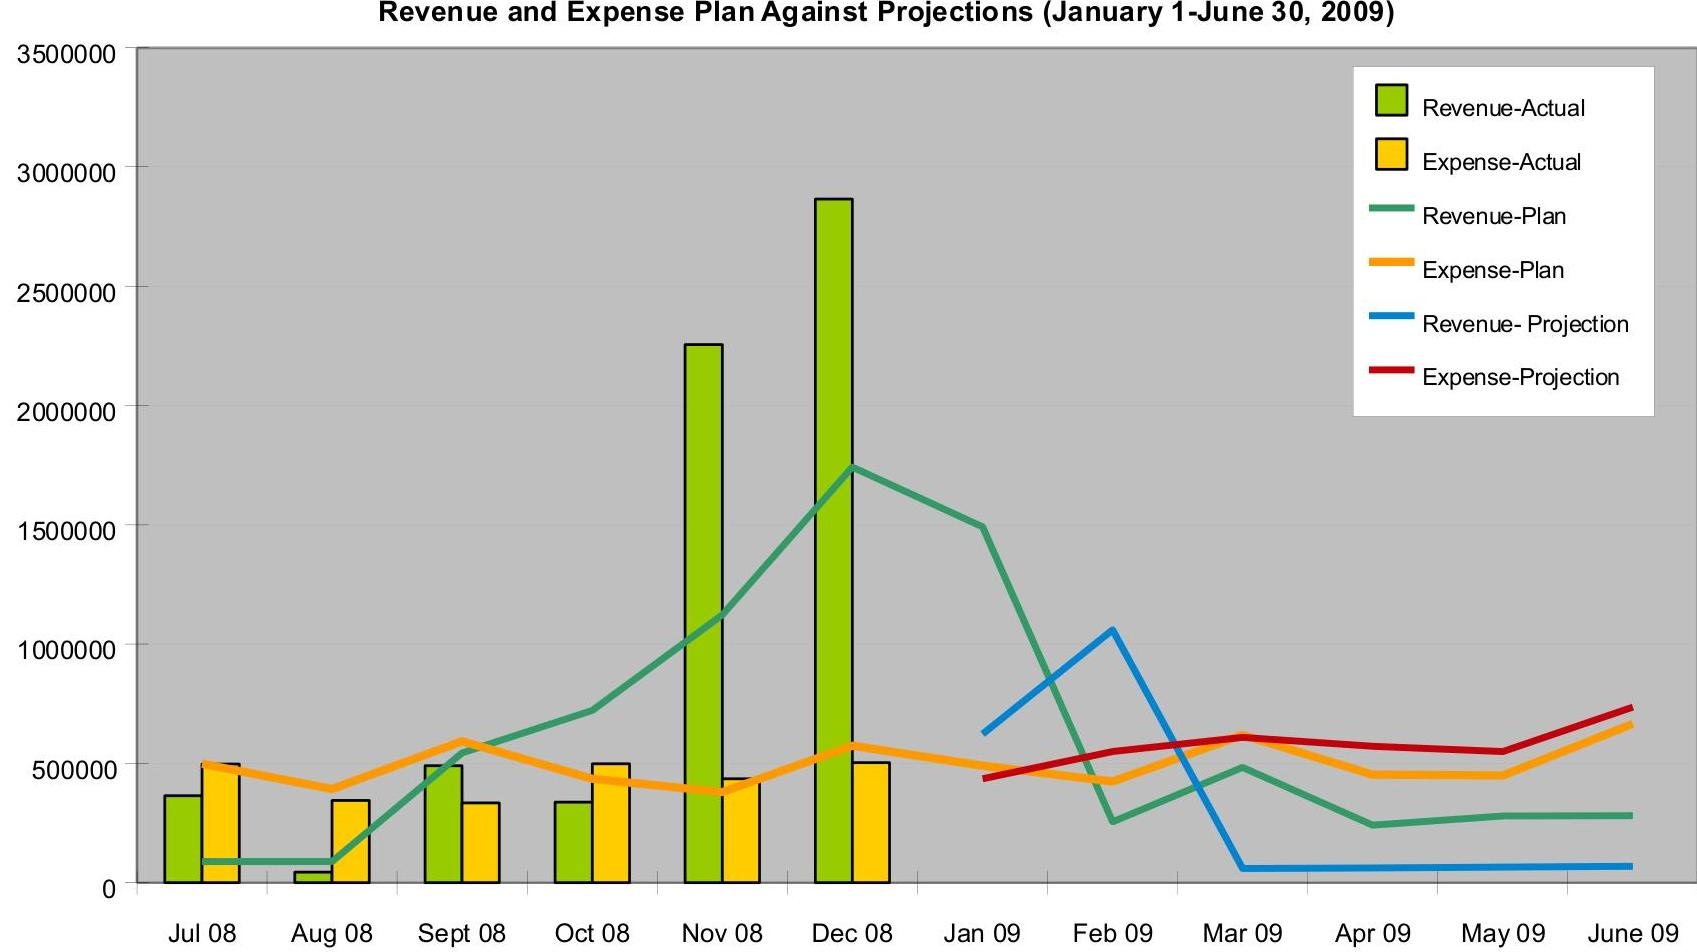

**{
  "image_type": "graph",
  "description": "A bar and line graph showing the revenue and expense plan against projections from January 1, 2009, to June 30, 2009. The graph includes actual revenue and expenses, planned revenue and expenses, and projected revenue and expenses. The x-axis represents the timeline from July 2008 to June 2009, while the y-axis represents the monetary values ranging from 0 to 3,500,000. Different colors and styles are used to differentiate between actual, planned, and projected values for both revenue and expenses."
}**

# Wikimedia Foundation

## Revenue and Expense Actuals Against Plan (July 1-December 31, 2008)

### Revenue and Expense Plan Against Projections (January 1-June 30, 2009)

|  Year | Jul 08 | Aug 08 | Sept 08 | Oct 08 | Nov 08 | Dec 08 | Jan 09 | Feb 09 | Mar 09 | Apr 09 | May 09 | June 09  |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|  **Income Statement** | $3500000 | $2500000 | $2000000 | $1500000 | $500000 | $2000000 | $1000000 | $500000 | $2000000 | $500000 | $1500000 | $500000  |

In [19]:
#@title PDF Financial Document

# Create the annotations formats
class ImageType(str, Enum):
    GRAPH = "graph"
    TEXT = "text"
    TABLE = "table"
    IMAGE = "image"

class Image(BaseModel):
    image_type: ImageType = Field(..., description="The type of the image. Must be one of 'graph', 'text', 'table' or 'image'.")
    description: str = Field(..., description="A description of the image.")

class Document(BaseModel):
    languages: list[str] = Field(..., description="The list of languages present in the document in ISO 639-1 code format (e.g., 'en', 'fr').")
    summary: str = Field(..., description="A summary of the document.")

# OCR Call with Annotations
annotations_response = client.ocr.process(
    model="mistral-ocr-latest",
    pages=list(range(8)), # Document Annotations has a limit of 8 pages, we recommend spliting your documents when using it; bbox annotations does not have the same limit
    document={
        "type": "document_url",
        "document_url": "https://upload.wikimedia.org/wikipedia/foundation/f/f6/WMF_Mid-Year-Financials_08-09-FINAL.pdf"
    },
    bbox_annotation_format=response_format_from_pydantic_model(Image),
    document_annotation_format=response_format_from_pydantic_model(Document),
    include_image_base64=True
  )

# Display combined markdowns and images
display(Markdown(get_combined_markdown_annotated(annotations_response)))